In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Manish Kumar Das Roll:22053522")

In [90]:
X = pd.read_csv(r"C:/Users/KIIT/Desktop/6thsem/ML project/linearX.csv", header=None).values.flatten()
y = pd.read_csv(r"C:/Users/KIIT/Desktop/6thsem/ML project/linearY.csv", header=None).values.flatten()

In [92]:
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized = (X - X_mean) / X_std]
X_with_bias = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

In [94]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        predictions = X @ theta
        gradient = (1 / m) * (X.T @ (predictions - y))
        theta -= lr * gradient
        costs.append(compute_cost(X, y, theta))
    return theta, costs

In [96]:

initial_theta = np.zeros(X_with_bias.shape[1])
learning_rate = 0.5
max_iterations = 1000
theta_final, costs = gradient_descent(X_with_bias, y, initial_theta, learning_rate, max_iterations)

print("Final theta values:", theta_final)
print("Final cost:", costs[-1])

Final theta values: [0.9966201 0.0013402]
Final cost: 1.1947898109836605e-06


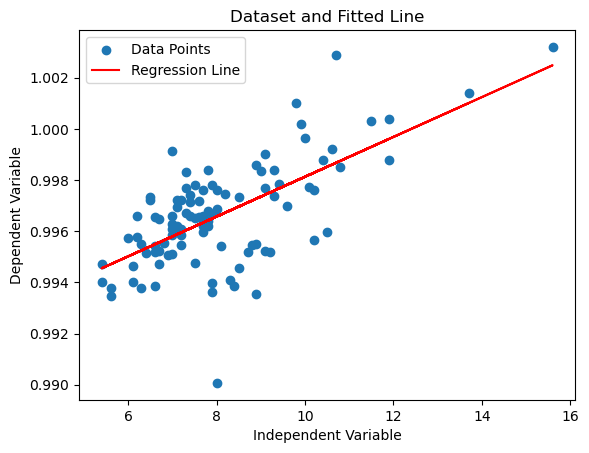

In [98]:
plt.scatter(X, y, label="Data Points")
y_pred = X_with_bias @ theta_final
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Dataset and Fitted Line")
plt.legend()
plt.show()

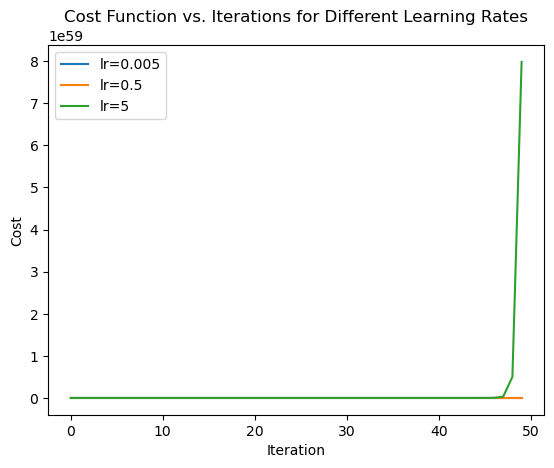

In [100]:
learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    theta, costs = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), lr, 50)
    plt.plot(range(50), costs, label=f"lr={lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.show()

In [102]:
def stochastic_gradient_descent(X, y, theta, lr, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        for j in range(m):
            rand_index = np.random.randint(m)
            X_j = X[rand_index:rand_index + 1]
            y_j = y[rand_index:rand_index + 1]
            gradient = X_j.T @ (X_j @ theta - y_j)
            theta -= lr * gradient
        costs.append(compute_cost(X, y, theta))
    return theta, costs

def mini_batch_gradient_descent(X, y, theta, lr, iterations, batch_size):
    m = len(y)
    costs = []
    for i in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]
            gradient = (1 / batch_size) * X_batch.T @ (X_batch @ theta - y_batch)
            theta -= lr * gradient
        costs.append(compute_cost(X, y, theta))
    return theta, costs

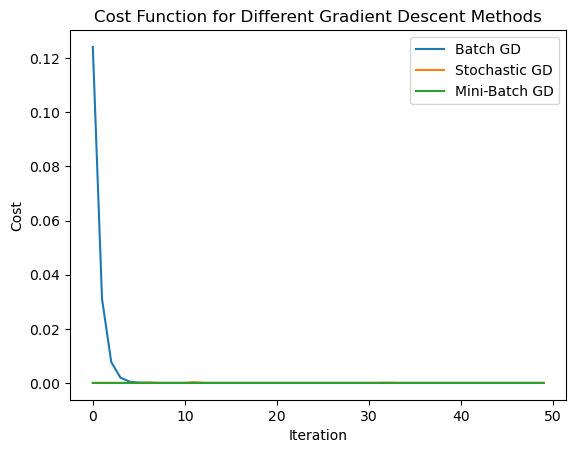

In [104]:
theta_batch, costs_batch = gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), learning_rate, 50)
theta_stoch, costs_stoch = stochastic_gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), learning_rate, 50)
theta_mini, costs_mini = mini_batch_gradient_descent(X_with_bias, y, np.zeros(X_with_bias.shape[1]), learning_rate, 50, batch_size=10)

plt.plot(range(50), costs_batch, label="Batch GD")
plt.plot(range(50), costs_stoch, label="Stochastic GD")
plt.plot(range(50), costs_mini, label="Mini-Batch GD")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function for Different Gradient Descent Methods")
plt.legend()
plt.show()